# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸基本概念

#### 直線

$$f(x) = 1.2x + 0.8$$



In [2]:
#準備 50 個點
#5-0/50 = 0.1 +....
# 0~5線性切割
x = np.linspace(0, 5, 50)
print(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


In [3]:
y = 1.2*x + 0.8 #預設答案
y

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])

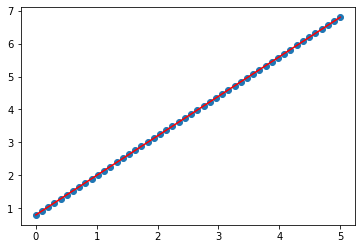

In [4]:
#畫圖
plt.scatter(x,y) #x,y散佈圖 50個資料點 =>blue
plt.plot(x, 1.2*x+0.8, 'r') #畫y=1.2x+0.8的曲線

#### add noise 

$$f(x) + \varepsilon(x)$$


In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50) #加上noise點
print(y)

[0.03677307 0.24090655 0.5272653  1.48112167 1.47923027 1.62321185
 1.22472088 2.93652184 1.27540494 1.96781735 2.52413919 2.63844429
 2.3525351  2.06454908 1.44932201 2.63856357 2.594776   3.61892802
 4.58509913 3.46587943 3.7722378  2.77308142 3.01319998 3.27865668
 2.90564367 4.13906556 3.86501323 3.6054574  3.32691896 5.3561622
 3.85160125 5.4928379  5.75005151 5.31050049 4.7952265  5.06964455
 5.00088846 3.28974903 4.38007673 5.76202189 4.91065034 6.17718391
 6.25659029 6.75059937 5.22127156 6.58850633 6.425352   6.47106017
 6.45943121 7.17650556]


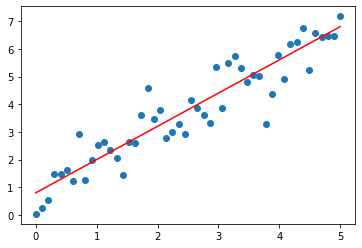

In [6]:
plt.scatter(x,y) #加了noise的x,y散佈圖 50個資料點
plt.plot(x, 1.2*x + 0.8, 'r') #預設答案

In [7]:
from sklearn.linear_model import LinearRegression #線性回歸
regr = LinearRegression() #將方法指派給regr的變數

In [9]:
regr

LinearRegression()

要求資料轉換<br>

$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$


矩陣的概念

In [10]:
print(x.shape) #x.shape本身為1D
X = x.reshape(-1,1) #1D->2D
X.shape

(50,)


(50, 1)

In [11]:
regr.fit(X,y) #對X, y做training

LinearRegression()

In [12]:
Pred_Y = regr.predict(X) #traing的預測答案
print(Pred_Y)

[0.80177594 0.92243847 1.043101   1.16376353 1.28442606 1.40508859
 1.52575112 1.64641365 1.76707618 1.88773871 2.00840124 2.12906377
 2.24972629 2.37038882 2.49105135 2.61171388 2.73237641 2.85303894
 2.97370147 3.094364   3.21502653 3.33568906 3.45635159 3.57701412
 3.69767665 3.81833917 3.9390017  4.05966423 4.18032676 4.30098929
 4.42165182 4.54231435 4.66297688 4.78363941 4.90430194 5.02496447
 5.145627   5.26628953 5.38695205 5.50761458 5.62827711 5.74893964
 5.86960217 5.9902647  6.11092723 6.23158976 6.35225229 6.47291482
 6.59357735 6.71423988]


In [13]:
#了解你的訓練參數
regr.get_params() #因為前方model LinearRegression()新生成只有預設值，所以訓練參數也只有預設值

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

0.4509378516683114


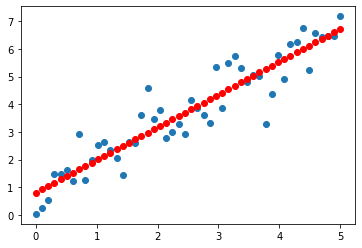

In [14]:
plt.scatter(x, y) #原本 
plt.plot(x, Pred_Y, 'ro') #預測
#calculate mse
mse = np.sum((Pred_Y-y)**2) / len(y)
print(mse)

In [15]:
#Y=WX+b
W=regr.coef_#斜率，記得程式要有底線。 原始斜率為1.2
W

array([1.18249279])

In [16]:
b=regr.intercept_ #截距，記得程式要有底線。 原始截距為0.8
b

0.8017759442875327

In [17]:
Pred_Y

array([0.80177594, 0.92243847, 1.043101  , 1.16376353, 1.28442606,
       1.40508859, 1.52575112, 1.64641365, 1.76707618, 1.88773871,
       2.00840124, 2.12906377, 2.24972629, 2.37038882, 2.49105135,
       2.61171388, 2.73237641, 2.85303894, 2.97370147, 3.094364  ,
       3.21502653, 3.33568906, 3.45635159, 3.57701412, 3.69767665,
       3.81833917, 3.9390017 , 4.05966423, 4.18032676, 4.30098929,
       4.42165182, 4.54231435, 4.66297688, 4.78363941, 4.90430194,
       5.02496447, 5.145627  , 5.26628953, 5.38695205, 5.50761458,
       5.62827711, 5.74893964, 5.86960217, 5.9902647 , 6.11092723,
       6.23158976, 6.35225229, 6.47291482, 6.59357735, 6.71423988])

In [18]:
#可以將新的x資料(x=3)帶入算出結果 (假設為test data set)
W*3+b

array([4.3492543])

In [19]:
W*0.51020408+b  #理論值為1.4122449

array([1.40508859])

In [20]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [22]:
1.2*x + 0.8

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])